## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


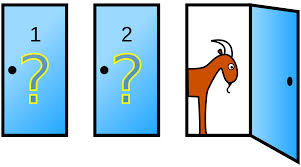

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [1]:
#your work here

In [2]:
import numpy as np
import random as rdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
smart=False
n_games=1000

smart_list=[]
fool_list=[]

for k in range (2):
    
    # Set iterations
    for j in range(n_games): 

        # Set randomly items in the doors

        door_items=pd.DataFrame([rdm.random(),rdm.random(),rdm.random()],['Goat 1','Goat 2','Car'],['Values'])
        door_items=door_items.sort_values(by=['Values'])

        door=pd.DataFrame([door_items.index[0],door_items.index[1],door_items.index[2]],[1,2,3],['Item'])

        #  ontestant choose a door

        chosen_door=round(rdm.uniform(0.5, 3.4))

        # Host open a door with one of the goats

        if door['Item'][chosen_door] != ('Goat 1'):
            door_open=door.index[door['Item']=='Goat 1']
        elif door['Item'][chosen_door] != ('Goat 2'):
                door_open=door.index[door['Item']=='Goat 2']

 
        # Change you initial door?

        # If change the door
        if smart == True:

            for i in range (len(door)):
                if (i+1 != chosen_door) and (i+1 != door_open):
                    chosen_door=i+1
                    break
            

        # Time to open the door

        # If have a lambo in the door!!!
        if door['Item'][chosen_door] == ('Car'):
            if smart==True:
                smart_list.append('Car')
            else:
                fool_list.append('Car')

        # If not :(    
        else:
            if smart==True:
                smart_list.append('Goat')  
            else:
                fool_list.append('Goat')

    # Now try with change the door                
    smart=True

In [4]:
# Results

data={'Car':[smart_list.count('Car'),fool_list.count('Car')],'Iterations':n_games}
monty_hall_data=pd.DataFrame(data=data,index=['Changing the door','Keep with the first door'])
monty_hall_data

,Car,Iterations
Changing the door,673,1000
Keep with the first door,307,1000


<AxesSubplot:ylabel='Car'>

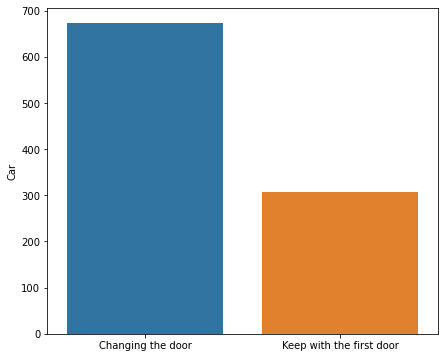

In [5]:
# Graph

plt.figure(figsize=(7,6))
sns.barplot(x=monty_hall_data.index,y=monty_hall_data['Car'])

# Analysis

By means of a simple simulation we can see how changing doors considerably increases the chances of success, this at first glance does not seem very logical. It would seem that your chance is always 1/3, but this is true as long as the presenter doesn't open another door.

As you can see, at the beginning all the doors have a 1/3 chance of hiding a car, so it can be said that your selected door has a 1/3 chance of success and the other two share the remaining 2/3. The moment they open a door showing one of the goats, the unselected door absorbs 1/3 of the open door. So we have that your initial door has a 1/3 chance of success, while the other one has a 2/3 chance.